In [1]:
import pandas as pd
import shapely
import geopandas as gpd
import string
from shapely.geometry import Point, Polygon


In [2]:
pand = pd.read_csv("PAND.csv", sep = ";", encoding = "utf-8", na_values = "NaN", on_bad_lines = "warn")

b'Skipping line 533308: expected 11 fields, saw 12\nSkipping line 542302: expected 11 fields, saw 12\nSkipping line 546913: expected 11 fields, saw 12\n'
b'Skipping line 2402168: expected 11 fields, saw 12\n'
b'Skipping line 6122630: expected 11 fields, saw 12\n'
b'Skipping line 6511403: expected 11 fields, saw 12\nSkipping line 6511405: expected 11 fields, saw 12\nSkipping line 6513243: expected 11 fields, saw 12\nSkipping line 6526419: expected 11 fields, saw 12\nSkipping line 6532284: expected 11 fields, saw 12\nSkipping line 6539521: expected 11 fields, saw 12\nSkipping line 6544341: expected 11 fields, saw 12\nSkipping line 6547862: expected 11 fields, saw 12\nSkipping line 6549397: expected 11 fields, saw 12\nSkipping line 6550250: expected 11 fields, saw 12\nSkipping line 6550252: expected 11 fields, saw 12\n'
b'Skipping line 6553782: expected 11 fields, saw 12\nSkipping line 6554368: expected 11 fields, saw 12\nSkipping line 6554878: expected 11 fields, saw 12\nSkipping line 65

In [171]:
def pandCleaner(data):
    data = data[data["identificatie"].notna()]
    data = data[data.posList.notna()]
    data = data[data.pandstatus.isin(["Pand in gebruik"])]
    data = data[data["aanduidingRecordInactief"] == "N"]

    data = data[data.bouwjaar.astype(int) < 2022]
    data.loc[data.bouwjaar.astype(int) < 1700, "bouwjaar"] = 1700
    
    data.begindatumTijdvakGeldigheid = data.begindatumTijdvakGeldigheid.apply(lambda x: str(x)[:8])
    data.einddatumTijdvakGeldigheid = data.einddatumTijdvakGeldigheid.apply(lambda x: str(x)[:8])
    
    data.loc[data.begindatumTijdvakGeldigheid.isna(), "begindatumTijdvakGeldigheid"] = data[data.begindatumTijdvakGeldigheid.isna()]["bouwjaar"].astype(int).astype(str) +"0101"
    
    
    data["begindatumTijdvakGeldigheid"] =  pd.to_datetime(data['begindatumTijdvakGeldigheid'], errors='coerce', format = "%Y%m%d")
    data["einddatumTijdvakGeldigheid"] =  pd.to_datetime(data['einddatumTijdvakGeldigheid'], errors='coerce', format = "%Y%m%d")
    
    data.drop_duplicates("identificatie", inplace = True)
    return data

In [172]:
p = pandCleaner(pand)

In [173]:
def pand_polygoner(inp):
    """
    Use as:
    can be used for pandas.apply function
    input: column containting string of polygons with x y z x y z etc
    output: polygons
    """
    total = []
    poly = []
    for i,n in enumerate(inp.split()):
        i += 1
        poly.append(float(n))
        
        if i % 3 == 0:
            total.append(poly)
            poly = [] 
            
    return Polygon(total)

In [174]:
p["geometry"] = p.posList.apply(pand_polygoner)

In [176]:
p.to_csv("pand_cleaned.csv", sep = ";")

In [178]:
p.identificatie.nunique()

10514893

In [22]:
df = gpd.GeoDataFrame(p)

In [113]:
import matplotlib.pyplot as plt

In [170]:
dubbel.shape

(3760925, 11)

171100000006203 1997.0 1997-09-09 00:00:00 NaT
171100000006203 1984.0 1984-05-21 00:00:00 2014-09-16 00:00:00
171100000006203 1984.0 2014-09-16 00:00:00 2019-09-06 00:00:00


C:\Users\Gebruiker\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


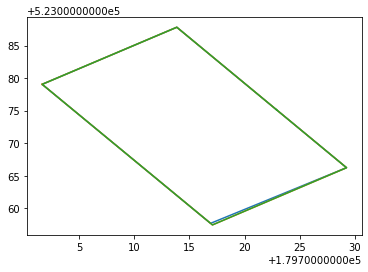

171100000006220 1957.0 1956-03-08 00:00:00 NaT
171100000006220 1994.0 1994-10-24 00:00:00 2017-11-20 00:00:00


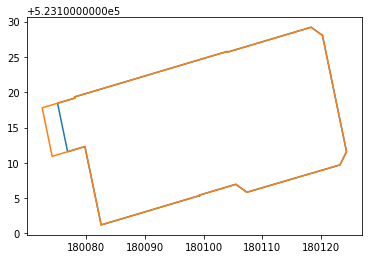

171100000006226 2006.0 2004-11-15 00:00:00 NaT
171100000006226 2004.0 2002-08-20 00:00:00 2012-10-05 00:00:00


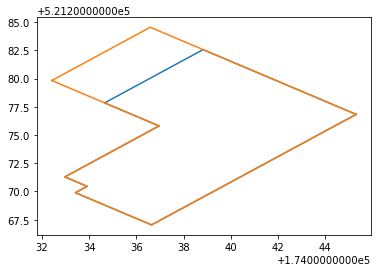

171100000006236 1998.0 1998-01-27 00:00:00 NaT
171100000006236 1951.0 1950-08-25 00:00:00 2018-04-19 00:00:00


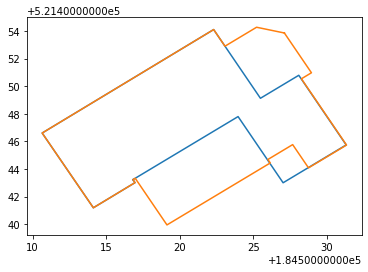

171100000006237 1951.0 2018-04-19 00:00:00 NaT
171100000006237 1975.0 1975-05-01 00:00:00 2011-07-18 00:00:00


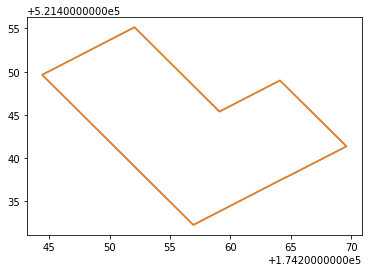

In [169]:
f = 500000
for i in range(f, f+5):
    a = p[p.identificatie == dubbel.identificatie.iloc[i]]
    a["geometry"] = a.posList.apply(pand_polygoner)
    for _, i in a.iterrows():
        print(int(i.identificatie), i.bouwjaar, i.begindatumTijdvakGeldigheid, i.einddatumTijdvakGeldigheid)
        plt.plot(*i.geometry.exterior.xy)
    plt.show()

In [165]:
dubbel.pandstatus.unique()

array(['Pand in gebruik'], dtype=object)

In [150]:
def tokeepornottokeep(inp):
    b = 0
    e = 0
    for c, i in inp.iterrows():
        
        print(i)
        if b == 0:
            b = i.begindatumTijdvakGeldigheid
            e = i.einddatumTijdvakGeldigheid
            if i.begindatumTijdvakGeldigheid == b and i.einddatumTijdvakGeldigheid == "NaT":
                print("goan", i.begindatumTijdvakGeldigheid)
            elif i.begindatumTijdvakGeldigheid == b and not i.einddatumTijdvakGeldigheid == "NaT":
                print("wegermee", i.begindatumTijdvakGeldigheid == b and i.begindatumTijdvakGeldigheid == "NaT")
                
            elif i.begindatumTijdvakGeldigheid > b
tokeepornottokeep(a)        

bouwjaar                                                                  1995.0
pandstatus                                                       Pand in gebruik
begindatumTijdvakGeldigheid                                  1994-12-19 00:00:00
einddatumTijdvakGeldigheid                                                   NaT
inOnderzoek                                                                    N
documentdatum                                                         19941219.0
documentnummer                                                            139/94
identificatie                                                    3100000117504.0
aanduidingRecordInactief                                                       N
officieel                                                                      N
posList                        254173.876 593396.885 0.0 254173.334 593393.19...
geometry                       POLYGON Z ((254173.876 593396.885 0, 254173.33...
Name: 20, dtype: object
bouw

In [27]:
df = df[df.aanduidingRecordInactief == "N"]

In [33]:
df = df.drop(["pandstatus", "inOnderzoek", "documentdatum", "documentnummer", "aanduidingRecordInactief", "officieel", "posList"], axis = 1)

In [36]:
df.to_csv("pand_cleaned.csv", sep = ";")

In [110]:
shapely.wkt.loads(pol)
print(P)

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring


WKTReadingError: Could not create geometry because of errors while reading input.

In [41]:
pandje = pandje.rename(columns = {"posList": "geometry"})
pandje = gpd.GeoDataFrame(pandje)

In [11]:
p.head()

,bouwjaar,pandstatus,begindatumTijdvakGeldigheid,einddatumTijdvakGeldigheid,inOnderzoek,documentdatum,documentnummer,identificatie,aanduidingRecordInactief,officieel,posList
1,1991.0,Pand in gebruik,NaT,NaT,N,20100720.0,FB 2010/PANDEN001,3.100000e+12,N,N,253822.701 593455.662 0.0 253826.352 593500.0 ...
2,1970.0,Pand in gebruik,NaT,NaT,N,20100720.0,FB 2010/PANDEN001,3.100000e+12,N,N,249943.307 593511.272 0.0 249948.555 593512.79...
3,1994.0,Pand in gebruik,NaT,NaT,N,19940527.0,66/94,3.100000e+12,N,N,252002.1 593526.23 0.0 252000.73 593522.9 0.0 ...
4,1989.0,Pand in gebruik,NaT,NaT,N,20100720.0,FB 2010/PANDEN001,3.100000e+12,N,N,253227.559 593526.493 0.0 253231.617 593526.03...
5,1925.0,Pand in gebruik,NaT,NaT,N,20011204.0,141/01,3.100000e+12,N,N,253311.271 593541.787 0.0 253310.818 593541.3 ...


In [14]:
pand.head()
pandje = pand.iloc[:100]

In [18]:
pd.to_datetime(pandje.begindatumTijdvakGeldigheid)

0                        NaT
1    1970-01-24 06:21:12.000
2    1970-01-24 06:21:12.000
3    1970-01-24 01:54:12.700
4    1970-01-24 06:21:12.000
               ...          
95   1970-01-24 06:55:02.500
96   1970-01-24 07:10:21.500
97   1970-01-24 06:21:12.000
98   1970-01-24 07:28:22.200
99   1970-01-24 07:43:51.000
Name: begindatumTijdvakGeldigheid, Length: 100, dtype: datetime64[ns]

In [13]:
pd.to_datetime(pand['begindatumTijdvakGeldigheid'], format='%Y%m%d%H%M%S%f', errors='coerce')

0          NaT
1          NaT
2          NaT
3          NaT
4          NaT
            ..
19112107   NaT
19112108   NaT
19112109   NaT
19112110   NaT
19112111   NaT
Name: begindatumTijdvakGeldigheid, Length: 19112112, dtype: datetime64[ns]

In [17]:
pand.loc[18819500:18819520]

,bouwjaar,pandstatus,begindatumTijdvakGeldigheid,einddatumTijdvakGeldigheid,inOnderzoek,documentdatum,documentnummer,identificatie,aanduidingRecordInactief,officieel,posList
18819500,1955.0,Pand in gebruik (niet ingemeten),2019081600000400,2020061500000500,N,20190816.0,564509,1.916100e+15,N,N,86636.811 454609.243 0.0 86633.023 454614.102 ...
18819501,1955.0,Pand in gebruik,2020061500000500,NaN,N,20200615.0,646453,1.916100e+15,N,N,86619.459 454613.738 0.0 86617.606 454616.174 ...
18819502,1955.0,Pand in gebruik,2009091700000000,NaN,N,20090917.0,2009/21608_65285,1.916100e+15,N,N,86633.998 454614.864 0.0 86632.438 454616.866 ...
18819503,1955.0,Pand in gebruik,2009091700000000,2018100100000100,N,20090917.0,2009/21608_65285,1.916100e+15,N,N,86633.998 454614.864 0.0 86632.438 454616.866 ...
18819504,1955.0,Pand in gebruik,2018100100000100,NaN,N,20181001.0,466849,NaN,NaN,NaN,NaN
18819505,NaN,1916100000109307,N,N,86619.459 454613.738 0.0 86621.075 454614.963 ...,NaN,NaN,NaN,NaN,NaN,NaN
18819506,1955.0,Pand in gebruik,2009091700000000,NaN,N,20090917.0,2009/21608_65285,1.916100e+15,N,N,86616.16 454616.786 0.0 86614.378 454619.176 0...
18819507,1955.0,Pand in gebruik,2009091700000000,2019102800000100,N,20090917.0,2009/21608_65285,1.916100e+15,N,N,86616.126 454616.833 0.0 86614.378 454619.176 ...
18819508,1955.0,Pand in gebruik,2019102800000100,NaN,N,20191028.0,581713,1.916100e+15,N,N,86616.16 454616.786 0.0 86618.261 454618.303 0...
18819509,1955.0,Pand in gebruik,2009091700000000,2019102800000100,N,20090917.0,2009/21608_65285,1.916100e+15,N,N,86616.126 454616.833 0.0 86618.191 454618.394 ...
